# Neural network - Perceptron

## importy

In [19]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from data_encoder import encode_data
import seaborn as sns
import matplotlib.pyplot as plt

## dane

In [20]:
network_data = pd.read_csv('dataset_sdn.csv')
print(network_data)
null_info = network_data.isna().sum()
print(null_info)

ip_encoding = 3 # one hot encoding
X_train, X_test, y_train, y_test = encode_data(network_data, ip_encoding, drop=True)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

           dt  switch        src       dst  pktcount  bytecount  dur  \
0       11425       1   10.0.0.1  10.0.0.8     45304   48294064  100   
1       11605       1   10.0.0.1  10.0.0.8    126395  134737070  280   
2       11425       1   10.0.0.2  10.0.0.8     90333   96294978  200   
3       11425       1   10.0.0.2  10.0.0.8     90333   96294978  200   
4       11425       1   10.0.0.2  10.0.0.8     90333   96294978  200   
...       ...     ...        ...       ...       ...        ...  ...   
104340   5262       3   10.0.0.5  10.0.0.7        79       7742   81   
104341   5262       3   10.0.0.5  10.0.0.7        79       7742   81   
104342   5262       3  10.0.0.11  10.0.0.5        31       3038   31   
104343   5262       3  10.0.0.11  10.0.0.5        31       3038   31   
104344   5262       3  10.0.0.11  10.0.0.5        31       3038   31   

         dur_nsec       tot_dur  flows  ...  pktrate  Pairflow  Protocol  \
0       716000000  1.010000e+11      3  ...      451       

## uczenie modelu

              precision    recall  f1-score   support

           0       0.73      0.85      0.78     19266
           1       0.67      0.50      0.58     12038

    accuracy                           0.71     31304
   macro avg       0.70      0.68      0.68     31304
weighted avg       0.71      0.71      0.70     31304



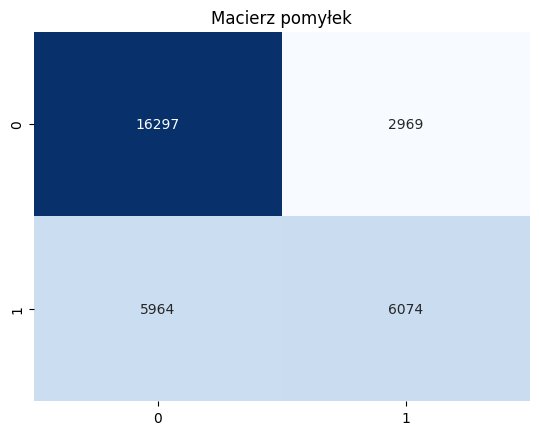

In [21]:
perceptron = Perceptron(max_iter=1200, tol=1e-3)
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)
report = classification_report(y_test, y_pred)

print(report)
sns.heatmap(confusion_matrix(y_test, y_pred), fmt="d", annot=True, cmap='Blues', cbar=False)
plt.title('Macierz pomyłek')
plt.show()